LTT1445 was sucessfully obeserved!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/'
x1ds = np.hstack((glob.glob('{}*oeoo*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01040_sx1.fits'],
      dtype='<U68')

/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01010_x1d.fits
G140M
193.15268


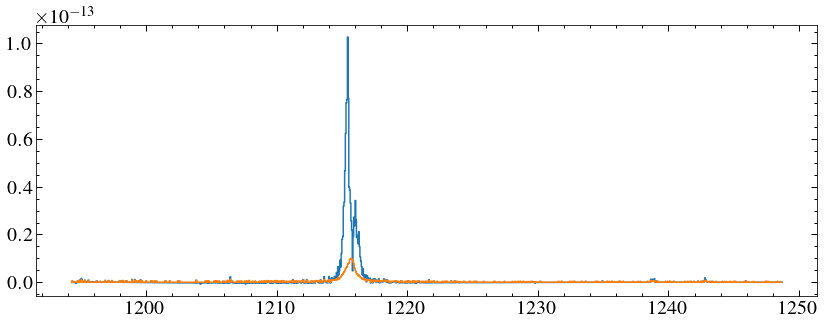

/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01020_x1d.fits
G140M
411.88312


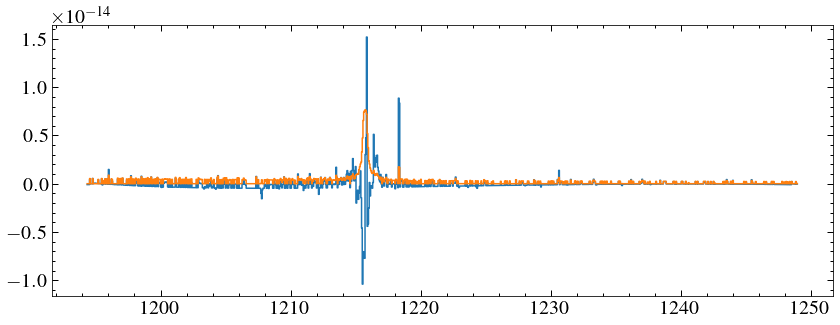

/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01030_x1d.fits
G230L
552.68646


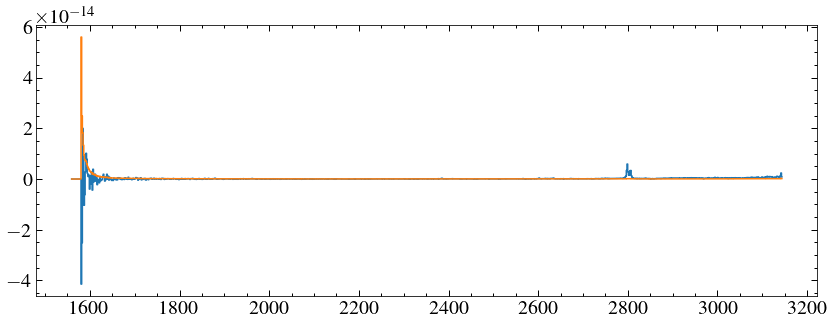

/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01040_sx1.fits
G430L
894.7632


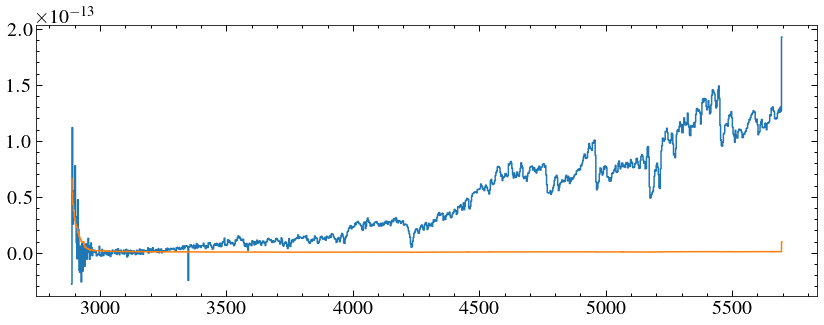

In [4]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1600
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

oeoo01020_x1d.fits needs re-extracting, trace looks good on the flt.

In [5]:
import stistools
os.environ['oref'] = path 

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [10]:
for root in  ['oeoo01020']:

    raw = '{}/{}_flt.fits'.format(path, root)
    rootname = fits.getheader(raw)['ROOTNAME'] 
    outname = 'reextractions/{}_new_x1d.fits'.format(rootname)
    stistools.x1d.x1d(raw, output = outname, trailer='reextractions/{}_new.trl'.format(rootname), a2center=193, maxsrch=10)

193.22672


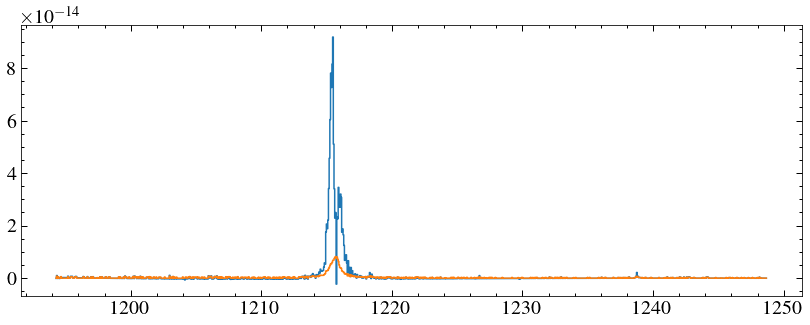

In [11]:
for root in  ['oeoo01020']:
        data = fits.getdata('reextractions/{}_new_x1d.fits'.format(root), 1)[0]
        print(data['A2Center'])
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        # mask = w > 1700
        # w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid')
        plt.step(w, e, where='mid')
        plt.show()

Easy peasy

In [12]:
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01040_sx1.fits'],
      dtype='<U68')

In [13]:
x1ds = np.array(['/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01010_x1d.fits',
       '/home/david/work/meats/SEDs/reextractions/oeoo01020_new_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01040_sx1.fits'])

/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01010_x1d.fits
G140M
193.15268
/home/david/work/meats/SEDs/reextractions/oeoo01020_new_x1d.fits
G140M
193.22672


(1210.0, 1220.0)

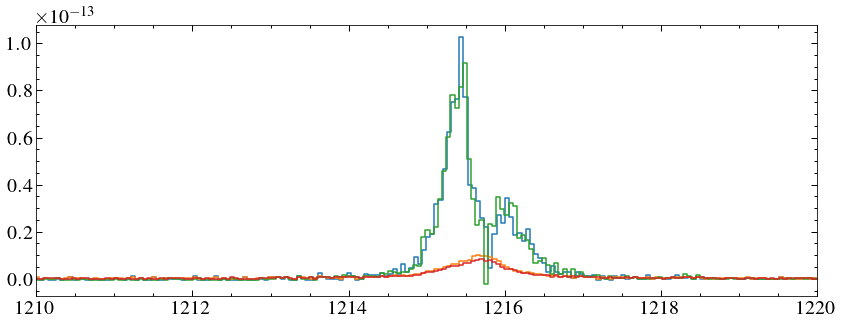

In [15]:
for x in x1ds[0:2]:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1600
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
plt.xlim(1210, 1220)
    # plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01040_sx1.fits
G430L
894.7632
/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01030_x1d.fits
G230L
552.68646
/home/david/work/meats/SEDs/reextractions/oeoo01020_new_x1d.fits
G140M
193.22672
/media/david/2tb_ext_hd/hddata/meats/hst/ltt1445A/oeoo01010_x1d.fits
G140M
193.15268


(1e-17, 4.2766630934419007e-13)

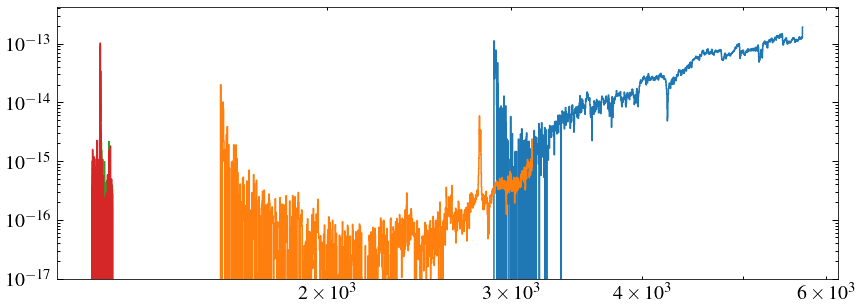

In [19]:
for x in x1ds[::-1]:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1600
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
# plt.xlim(1210, 1220)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-17)
    # plt.show()
    